<a href="https://colab.research.google.com/github/Nguyen379/Mask_detection/blob/main/combined_haar_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd

'/content/drive/My Drive/Colab Notebooks/AI4E/Final Project/Mask detection'

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection"

/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection


In [ ]:
%ls

 Analyze_data.ipynb          masks_no_improper/     scores/
 combined_haar_model.ipynb   model_checkpoint/      ViT.ipynb
'Face Mask Dataset'/         Model_training.ipynb
 haarcascade/                Ref_image.png


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import cv2

face_model = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/haarcascade/haarcascade_frontalface_default.xml")
efn = load_model("model_checkpoint/efn.h5")

In [ ]:
import cv2
import math
from scipy.spatial import distance 
ref_width = 187
Known_distance = 76.2
Known_width = 14.3
 
 
def Focal_Length_Finder(Known_distance, Known_width, ref_image_face_width):
    focal_length = (ref_image_face_width * Known_distance) / Known_width
    return focal_length

def Distance_finder(Focal_Length, Known_width, ref_image_face_width):
    distance = (Known_width * Focal_Length)/ref_image_face_width
    return distance

In [ ]:
def screen_distance(detected_face, img):
    distances = []
    for face in range(len(detected_face)):
        Focal_length_found = Focal_Length_Finder(
            Known_distance, Known_width, ref_width) 

        x, y, w, h = detected_face[face]

        Distance = Distance_finder(
            Focal_length_found, Known_width, w)
        distances.append(Distance)
        # cv2.rectangle(img, (x,y), (x+w,y+h), (0, 200, 0), 2)
        # cv2.putText(
        #     img, f"{round(Distance,2)} CM", (x, y-5),
        #     cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 200, 0), 2)
    return distances

In [ ]:
mask_label = {0: "Mask", 1:"No mask"}
dist_label = {0: (0, 255, 0), 1:(225, 0, 0)}
def detect_distance(detected_face, img):
    distances = screen_distance(detected_face, img)
    if len(detected_face) < 1:
        return img
    elif len(detected_face) == 1:
        for face in range(len(detected_face)):
            x, y, w, h = detected_face[face]
            f = img[y:y+h, x:x+w]
            f = cv2.resize(f, (224, 224))
            f = np.reshape(f, [1,224,224,3])
            f = preprocess_input(f)
            res = efn.predict(f)
            cv2.rectangle(img, (x,y), (x+w,y+h), dist_label[0], 2)
            cv2.putText(
                img, f"{mask_label[res.argmax()]}", (x, y-5),
                cv2.FONT_HERSHEY_COMPLEX, 0.5,
                dist_label[0])
    else:
        label = [0 for n in range(len(detected_face))]
        for face1 in range(0, len(detected_face)-1):
            for face2 in range(face1+1, len(detected_face)):
                face_dist = distance.euclidean(detected_face[face1][:2], 
                                               detected_face[face2][:2])
                face_width = min(detected_face[face1][2], detected_face[face2][2])
                face_dist_actual = (face_dist/face_width*30)
                screen_distance_actual = abs(distances[face1]-distances[face2])
                six_feet = math.sqrt(screen_distance_actual**2 +
                                     face_dist_actual**2)
                if (six_feet < 120):
                    label[face1]=1
                    label[face2]=1
        # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        for face in range(len(detected_face)):
            x, y, w, h = detected_face[face]
            f = img[y:y+h, x:x+w]
            f = cv2.resize(f, (224, 224))
            f = np.reshape(f, [1,224,224,3])
            f = preprocess_input(f)
            res = efn.predict(f)
            cv2.rectangle(img, (x,y), (x+w,y+h), dist_label[label[face]], 2)
            cv2.putText(
                img, f"{mask_label[res.argmax()]}", (x, y-5),
                cv2.FONT_HERSHEY_COMPLEX, 0.5,
                dist_label[res.argmax()])
    return img

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss244.png"
# img = cv2.imread(path)
# img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
# detected_face = face_model.detectMultiScale(img)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# print(img.shape)
# for i in range(len(detected_face)):
#     plt.subplot(1, 3, i+1)
#     (x,y,w,h) = detected_face[i]
#     crop = img[y:y+h, x:x+w] # 108 x 108
#     print(crop.shape)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(crop)
#     # resize then reshape into rgb
#     crop = cv2.resize(crop, (224,224)) # 224x224
#     crop = np.reshape(crop, [1,224,224,3]) # 1x224x224x3
#     # preprocess: /255 for inception
#     crop = preprocess_input(crop)
#     res = efn.predict(crop)
#     print(res)
#     print(res.argmax())


minFactor: Higher value results in fewer detections but with higher quality

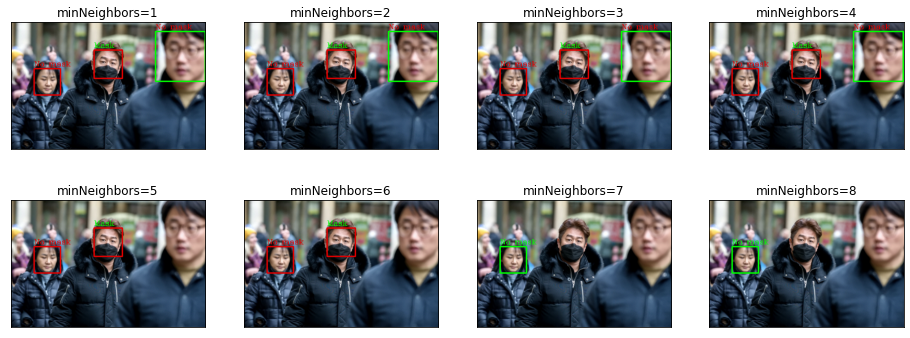

In [ ]:
plt.figure(figsize=(16,6))
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss244.png"
for n in range(1, 9):
    plt.subplot(2, 4, n)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img, minNeighbors=n)    
    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    output_img = detect_distance(detected_face, output_img)
    plt.title(f"minNeighbors={n}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)

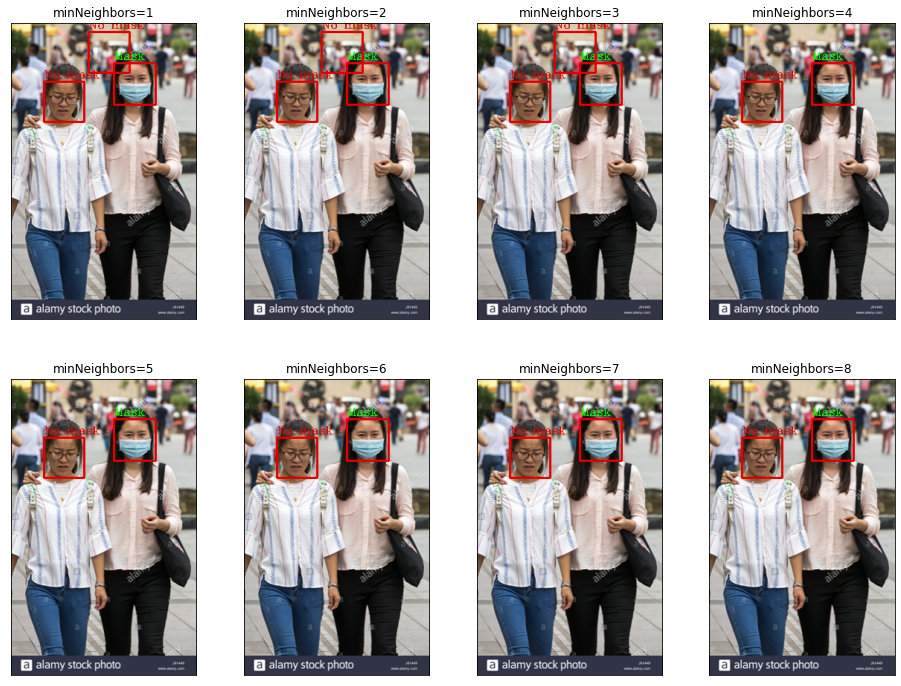

In [ ]:
plt.figure(figsize=(16,12))
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss352.png"
for n in range(1, 9):
    plt.subplot(2, 4, n)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img, minNeighbors=n)    
    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    output_img = detect_distance(detected_face, output_img)
    plt.title(f"minNeighbors={n}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)

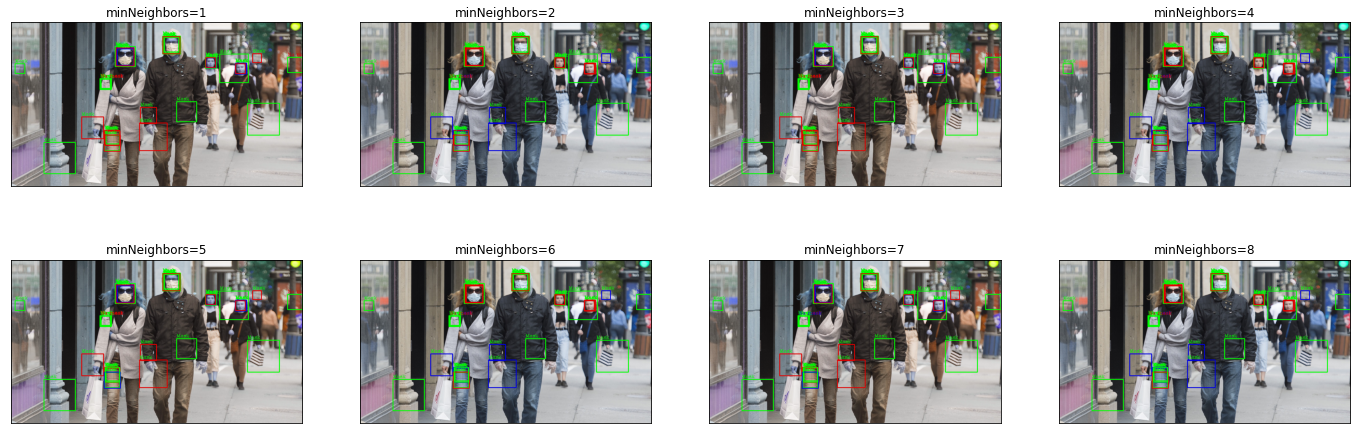

In [ ]:
from skimage import io
plt.figure(figsize=(24, 8))
path = "https://www.ctvnews.ca/polopoly_fs/1.4986740.1592334933!/httpImage/image.jpg_gen/derivatives/landscape_960/image.jpg"
for n in range(1, 9):
    plt.subplot(2, 4, n)
    img = io.imread(path)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img, minNeighbors=n)    
    output_img = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    output_img = detect_distance(detected_face, output_img)

    plt.title(f"minNeighbors={n}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)

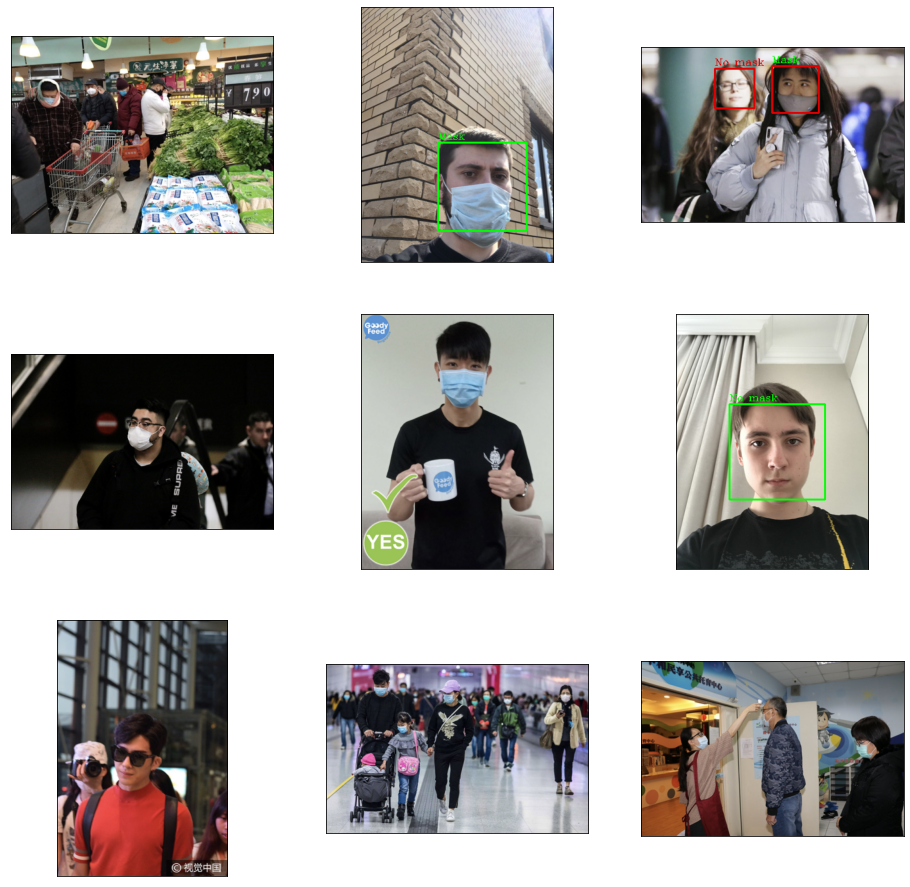

In [ ]:
import random, os
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images"
plt.figure(figsize=(16,16))
for n in range(1,10):
    plt.subplot(3,3,n)
    image_file = [os.path.join(path,x) for x in os.listdir(path)
        if os.path.isfile(os.path.join(path,x))]
    random_filename = random.choice(image_file)
    img = cv2.imread(random_filename)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img, minNeighbors=4)    
    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    output_img = detect_distance(detected_face, output_img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)